In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
  
# import the KNNimputer class
from sklearn.impute import KNNImputer

import pandas as pd
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('/content/project_data.csv')

y_compressive = dataset['Compressive strength\nfcu,t\n(MPa)']
y_tensile = dataset['Splitting tensile strength fst,t(MPa)']
dataset.drop(['Compressive strength\nfcu,t\n(MPa)', 'Splitting tensile strength fst,t(MPa)'], axis=1, inplace=True)

# Break off validation set from training data
X_train, X_valid, y_train_compressive, y_valid_compressive, y_train_tensile, y_valid_tensile = train_test_split(dataset, y_compressive, y_tensile, train_size=0.8, test_size=0.2, random_state=0)

print(len(X_train))
print(X_train.head())
print()
print()
print(y_train_compressive.head())
print(y_train_tensile.head())

571
     Compressive strength of cement fce(MPa)  \
310                                     43.7   
542                                      NaN   
17                                      46.8   
266                                     52.7   
318                                     43.7   

     Tensile strength of cement fct(MPa)  Curing age (day)  \
310                                  7.5                28   
542                                  NaN                 7   
17                                   8.0                56   
266                                  9.0                 3   
318                                  7.5                28   

     Dmax of Crushed stone (mm)  Stone powder content in Sand (%)  \
310                        25.0                               NaN   
542                         NaN                              11.2   
17                         31.5                              13.0   
266                        31.5                           

In [ ]:
print(X_valid)
print()
print(len(X_valid))

     Compressive strength of cement fce(MPa)  \
339                                    55.20   
142                                    47.70   
243                                      NaN   
236                                      NaN   
712                                    48.07   
..                                       ...   
245                                      NaN   
303                                    43.70   
97                                     46.80   
375                                    52.60   
484                                      NaN   

     Tensile strength of cement fct(MPa)  Curing age (day)  \
339                                  8.9                28   
142                                  8.7                28   
243                                  NaN                28   
236                                  NaN                 7   
712                                  NaN                28   
..                                   ...           

# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# creating a data frame from the list 
Before_imputation = pd.DataFrame(X_train)
#print dataset before imputaion
print("Data Before performing imputation\n",Before_imputation)
  
# create an object for KNNImputer
imputer = KNNImputer(n_neighbors=10)
After_imputation = imputer.fit_transform(Before_imputation)
# print dataset after performing the operation
print("\n\nAfter performing imputation\n",After_imputation)

dataset_imputed = pd.DataFrame(After_imputation, columns=X_train.columns)

Data Before performing imputation
      Compressive strength of cement fce(MPa)  \
310                                    43.70   
542                                      NaN   
17                                     46.80   
266                                    52.70   
318                                    43.70   
..                                       ...   
707                                    39.42   
192                                      NaN   
629                                    62.40   
559                                      NaN   
684                                    52.90   

     Tensile strength of cement fct(MPa)  Curing age (day)  \
310                                  7.5                28   
542                                  NaN                 7   
17                                   8.0                56   
266                                  9.0                 3   
318                                  7.5                28   
..              

In [ ]:
# creating a data frame from the list 
Bef_imputation = pd.DataFrame(X_valid)
#print dataset before imputaion
print("Test Data Before performing imputation\n",Bef_imputation)
  
# create an object for KNNImputer
imputer = KNNImputer(n_neighbors=10)
Aft_imputation = imputer.fit_transform(Bef_imputation)
# print dataset after performing the operation
print("\n\n Test After performing imputation\n",Aft_imputation)

t_dataset_imputed = pd.DataFrame(Aft_imputation, columns=X_valid.columns)

Test Data Before performing imputation
      Compressive strength of cement fce(MPa)  \
339                                    55.20   
142                                    47.70   
243                                      NaN   
236                                      NaN   
712                                    48.07   
..                                       ...   
245                                      NaN   
303                                    43.70   
97                                     46.80   
375                                    52.60   
484                                      NaN   

     Tensile strength of cement fct(MPa)  Curing age (day)  \
339                                  8.9                28   
142                                  8.7                28   
243                                  NaN                28   
236                                  NaN                 7   
712                                  NaN                28   
..         

In [ ]:

from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Define n_estimators values to be tested
n_estimators_list = [50, 100, 150, 200]

# Initialize variables to keep track of best model and MAE
best_model = None
best_mae = None

# Loop through each value of n_estimators
for n_estimators in n_estimators_list:
    
    # Initialize XGBoost model for Compressive strength with current n_estimators value
    xg_comp_model = XGBRegressor(n_estimators=n_estimators, random_state=0)
    
    # Fit Compressive strength model to training data
    xg_comp_model.fit(X_train, y_train_compressive)
    
    # Make Compressive strength predictions on validation data
    comp_preds = xg_comp_model.predict(X_valid)
    
    # Calculate Compressive strength MAE for current model
    comp_mae = mean_absolute_error(y_valid_compressive, comp_preds)
    
    # Initialize XGBoost model for Splitting tensile strength fst,t(MPa) with current n_estimators value
    split_model = XGBRegressor(n_estimators=n_estimators, random_state=0)
    
    # Fit Splitting tensile strength fst,t(MPa) model to training data
    split_model.fit(X_train, y_train_tensile)
    
    # Make Splitting tensile strength fst,t(MPa) predictions on validation data
    split_preds = split_model.predict(X_valid)
    
    # Calculate Splitting tensile strength fst,t(MPa) MAE for current model
    split_mae = mean_absolute_error(y_valid_tensile, split_preds)
    
    # Calculate overall MAE for current model as the mean of the two MAEs
    overall_mae = (comp_mae + split_mae) / 2
    
    # Print results for current model
    print(f"n_estimators: {n_estimators}, Compressive strength MAE: {comp_mae}, Splitting tensile strength fst,t(MPa) MAE: {split_mae}, Overall MAE: {overall_mae}")
    
    # Check if current model is better than previous best model
    if best_mae is None or overall_mae < best_mae:
        best_model = (xg_comp_model, split_model)
        best_mae = overall_mae

# Print best model and MAE
print(f"Best model for Compressive strength: {best_model[0]}")
print(f"Best model for Splitting tensile strength fst,t(MPa): {best_model[1]}")
print(f"Least MAE: {best_mae}")



n_estimators: 50, Compressive strength MAE: 2.019536377566678, Splitting tensile strength fst,t(MPa) MAE: 0.19676850854100048, Overall MAE: 1.1081524430538392
n_estimators: 100, Compressive strength MAE: 1.9101029500094329, Splitting tensile strength fst,t(MPa) MAE: 0.1937889255176891, Overall MAE: 1.051945937763561
n_estimators: 150, Compressive strength MAE: 1.888027298933976, Splitting tensile strength fst,t(MPa) MAE: 0.19238461731197118, Overall MAE: 1.0402059581229735
n_estimators: 200, Compressive strength MAE: 1.8755342107386022, Splitting tensile strength fst,t(MPa) MAE: 0.19156640257868734, Overall MAE: 1.0335503066586447
Best model for Compressive strength: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importa

In [ ]:
# Now, by previous cell data, we take the 'n_estimator' with least MAE to train our model. 

import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Train the model for compressive strength
model_comp_xg = xgb.XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=0)
model_comp_xg.fit(X_train, y_train_compressive, early_stopping_rounds=5, eval_set=[(X_valid, y_valid_compressive)], verbose=False)
y_pred_comp_xg = model_comp_xg.predict(X_valid)
rmse_compressive = mean_squared_error(y_valid_compressive, y_pred_comp_xg, squared=False)
print(f"Compressive strength RMSE: {rmse_compressive}")

# Train the model for splitting tensile strength
model_tensile_xg = xgb.XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=0)
model_tensile_xg.fit(X_train, y_train_tensile, early_stopping_rounds=5, eval_set=[(X_valid, y_valid_tensile)], verbose=False)
y_pred_tensile_xg = model_tensile_xg.predict(X_valid)
rmse_tensile = mean_squared_error(y_valid_tensile, y_pred_tensile_xg, squared=False)
print(f"Splitting tensile strength RMSE: {rmse_tensile}")

# here we check the accuracy by finding RMSE between Y_predicted and Y_validation


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


Compressive strength RMSE: 2.915200306598082


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


Splitting tensile strength RMSE: 0.28689429019596946


In [ ]:
# Save test predictions to file
output = pd.DataFrame({'Compressive strength\nfcu,t\n(MPa)': y_pred_comp_xg,
                       'Splitting tensile strength fst,t(MPa)': y_pred_tensile_xg})
output.to_csv('cmp_output.csv', index=False)

In [ ]:
y_pred_compressive_dataframe = pd.DataFrame(y_pred_comp_xg)
y_pred_compressive_dataframe.head()

,0
0,68.479774
1,69.437675
2,41.830704
3,25.631042
4,63.937927


In [ ]:
y_pred_tensile_dataframe = pd.DataFrame(y_pred_tensile_xg)
y_pred_tensile_dataframe.head()

,0
0,4.449134
1,4.182842
2,3.011182
3,2.306951
4,4.436483


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


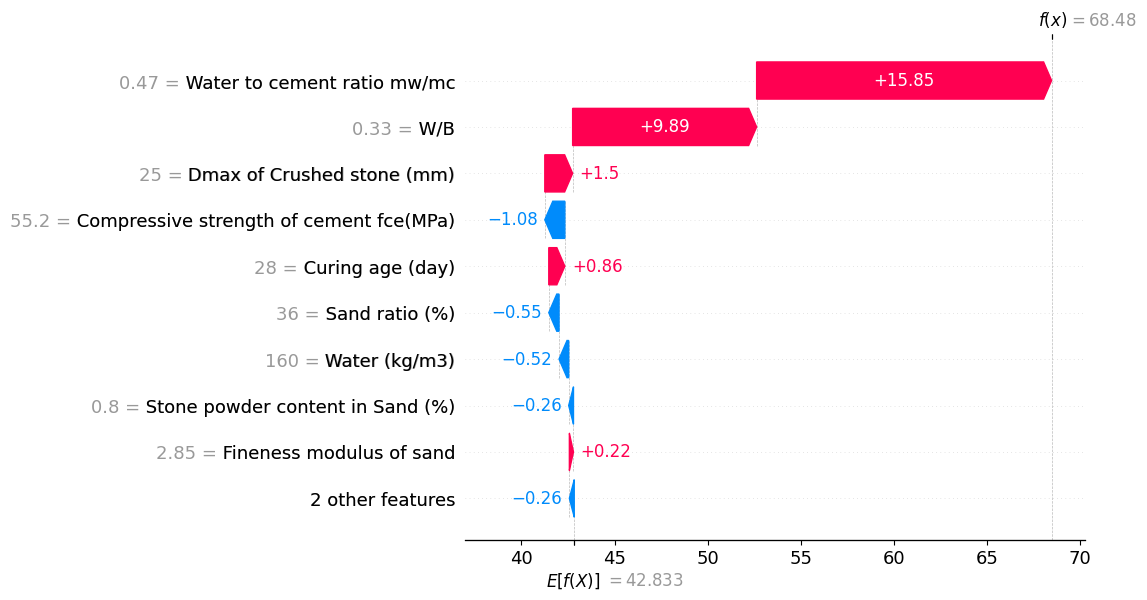

In [ ]:
import shap

# Create an explainer object
explainer = shap.Explainer(model_comp_xg)

# Calculate SHAP values for the first 100 instances in the test set
shap_values = explainer(X_valid[:100])

# Visualize the SHAP values for a single instance
shap.plots.waterfall(shap_values[0])


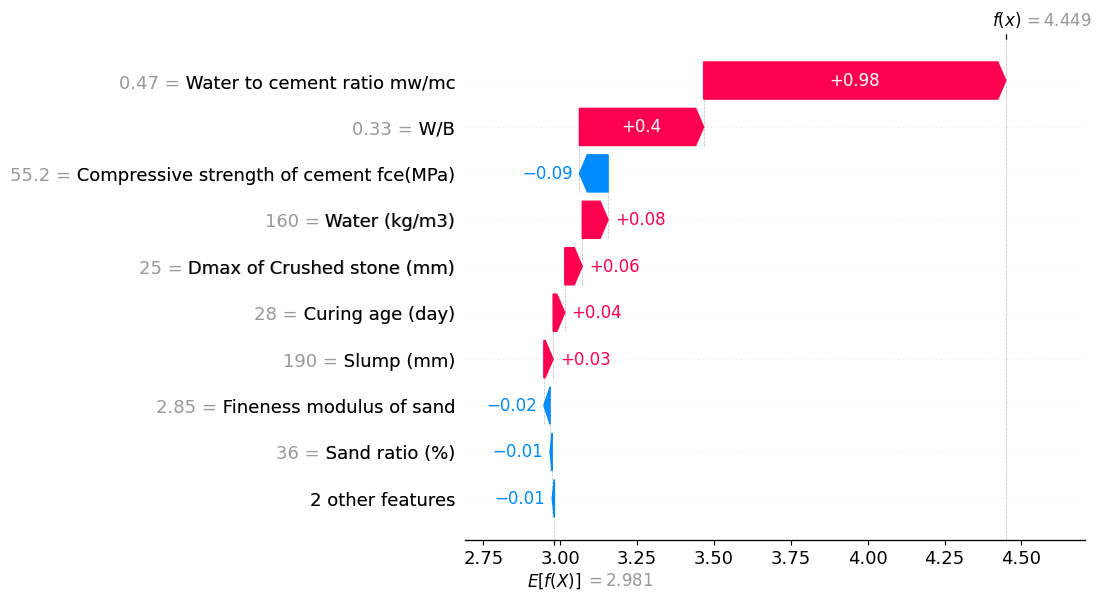

In [ ]:
# Create an explainer object
explainer = shap.Explainer(model_tensile_xg )

# Calculate SHAP values for the first 100 instances in the test set
shap_values = explainer(X_valid[:100])

# Visualize the SHAP values for a single instance
shap.plots.waterfall(shap_values[0])

In [ ]:
from sklearn.metrics import r2_score

# Calculate the accuracy score for the Validation Set
val_accuracy_comp_xg = r2_score(y_valid_compressive, y_pred_comp_xg)

print("Validation Accuracy_comp_xg:", val_accuracy_comp_xg)



Validation Accuracy_comp_xg: 0.9827900836067549


In [ ]:
from sklearn.metrics import r2_score

# Calculate the accuracy score for the Validation Set
val_accuracy_tensile_xg= r2_score(y_valid_tensile, y_pred_tensile_xg)

print("Validation Accuracy_tens_xg:", val_accuracy_tensile_xg)



Validation Accuracy_tens_xg: 0.9533514075103205


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [ ]:
dataset_imputed


,Compressive strength of cement fce(MPa),Tensile strength of cement fct(MPa),Curing age (day),Dmax of Crushed stone (mm),Stone powder content in Sand (%),Fineness modulus of sand,W/B,Water to cement ratio mw/mc,Water (kg/m3),Sand ratio (%),Slump (mm)
0,43.70,7.500,28.0,25.0,6.925,3.100,0.30,0.300,152.00,38.0,205.0
1,55.75,8.400,7.0,112.0,11.200,2.440,0.50,0.830,87.00,27.0,42.0
2,46.80,8.000,56.0,31.5,13.000,2.770,0.56,0.560,180.00,44.0,50.0
3,52.70,9.000,3.0,31.5,6.600,2.940,0.44,0.440,185.00,36.0,41.0
4,43.70,7.500,28.0,25.0,7.145,3.100,0.32,0.457,152.00,39.0,208.0
...,...,...,...,...,...,...,...,...,...,...,...
566,39.42,8.182,90.0,12.0,19.200,3.177,0.36,0.550,178.75,54.0,135.0
567,48.42,8.380,28.0,31.5,5.800,3.100,0.46,0.460,185.00,36.0,43.0
568,62.40,8.400,90.0,40.0,6.100,2.920,0.50,0.830,102.00,33.0,10.0
569,62.40,8.400,90.0,40.0,13.000,2.680,0.50,0.830,89.00,36.0,10.0


In [ ]:
from sklearn.model_selection import cross_val_score

# Define the Random Forest model
rf_model = RandomForestRegressor(random_state=0)

# Define the range of values to try for the number of estimators
estimator_range = range(50,301,50)

# Calculate the cross-validation scores for each value of the number of estimators
cv_scores = []
for num_estimators in estimator_range:
    rf_model.set_params(n_estimators=num_estimators)
    scores = -1 * cross_val_score(rf_model, dataset_imputed, y_train_compressive, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(scores.mean())

# Find the number of estimators with the lowest mean squared error
optimal_num_estimators = estimator_range[cv_scores.index(min(cv_scores))]
print('optimal_num_estimators= ', optimal_num_estimators)


# Train the final Random Forest model with the optimal number of estimators
rf_model.set_params(n_estimators=optimal_num_estimators)
rf_model.fit(dataset_imputed, y_train_compressive)

optimal_num_estimators=  100


RandomForestRegressor(random_state=0)

In [ ]:
# Make predictions on the validation set
y_pred_comp_rf = rf_model.predict(t_dataset_imputed)

print(len(y_valid_compressive))
print(len(y_pred_comp_rf))

143
143


In [ ]:
# # Make predictions on the validation set
# y_pred = rf_model.predict(t_dataset_imputed)

# Calculate the RMSE on the validation set
rmse = mean_squared_error(y_valid_compressive, y_pred_comp_rf, squared=False)

print(f"Validation RMSE: {rmse}")

Validation RMSE: 3.8940428620566587


In [ ]:
val_comp_accuracy_rf = r2_score(y_valid_compressive, y_pred_comp_rf)
print("Validation comp Accuracy:", val_comp_accuracy_rf)

Validation comp Accuracy: 0.9692925740226507


In [ ]:
# Calculate the cross-validation scores for each value of the number of estimators
cv_scores = []
for num_estimators in estimator_range:
    rf_model.set_params(n_estimators=num_estimators)
    scores = -1 * cross_val_score(rf_model, dataset_imputed, y_train_tensile, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(scores.mean())

# Find the number of estimators with the lowest mean squared error
optimal_num_estimators = estimator_range[cv_scores.index(min(cv_scores))]
print('optimal_num_estimators= ', optimal_num_estimators)


# Train the final Random Forest model with the optimal number of estimators
rf_model.set_params(n_estimators=optimal_num_estimators)
rf_model.fit(dataset_imputed, y_train_tensile)

optimal_num_estimators=  300


RandomForestRegressor(n_estimators=300, random_state=0)

In [ ]:
# Make predictions on the validation set
y_pred_tens_rf = rf_model.predict(t_dataset_imputed)

print(len(y_valid_tensile))
print(len(y_pred_tens_rf))

143
143


In [ ]:
val_tens_accuracy_rf = r2_score(y_valid_tensile, y_pred_tens_rf)
print("Validation tensile Accuracy:", val_tens_accuracy_rf)

Validation tensile Accuracy: 0.9340840036382903


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

# Define the model architecture
model_nn = Sequential()
model_nn.add(Dense(64, input_dim=11, activation='relu'))
model_nn.add(Dense(128, activation='sigmoid'))
model_nn.add(Dense(64, activation='relu'))
model_nn.add(Dense(1, activation='linear'))


# Compile the model
model_nn.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model_nn.fit(dataset_imputed, y_train_compressive, epochs=100, batch_size=32, verbose=0)

#predict the value for validation dataset
y_pred_comp_nn = model_nn.predict(t_dataset_imputed)


# calculate the r2 score
r2_comp_nn = r2_score(y_valid_compressive, y_pred_comp_nn)

print("validation_accuracy_comp_nn", r2_comp_nn)





5/5 [==============================] - 0s 2ms/step
validation_accuracy_comp_nn 0.872909319164508


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

# Define the model architecture
model_nn = Sequential()
model_nn.add(Dense(64, input_dim=11, activation='relu'))
model_nn.add(Dense(128, activation='sigmoid'))
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dense(1, activation='linear'))


# Compile the model
model_nn.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model_nn.fit(dataset_imputed, y_train_tensile, epochs=100, batch_size=32, verbose=0)

#predict the value for validation dataset
y_pred_tens_nn = model_nn.predict(t_dataset_imputed)


# calculate the r2 score
r2_tens_nn = r2_score(y_valid_tensile, y_pred_tens_nn)

print("validation_accuracy_tens_nn", r2_tens_nn)





5/5 [==============================] - 0s 4ms/step
validation_accuracy_tens_nn 0.8102429341392549


In [ ]:
from sklearn.linear_model import LinearRegression


# Make predictions on the validation set using base models


# Concatenate the base model predictions
X_meta = np.column_stack(( y_pred_comp_rf, y_pred_comp_xg, y_pred_comp_nn))

# Train a meta model on the base model predictions
meta_model = LinearRegression()
meta_model.fit(X_meta, y_valid_compressive)

# Make predictions on the test set using the meta model
y_pred_meta = meta_model.predict(np.column_stack(( rf_model.predict(t_dataset_imputed), model_comp_xg.predict(t_dataset_imputed), model_nn.predict(t_dataset_imputed))))

# Evaluate the meta model
meta_accuracy = r2_score(y_valid_compressive, y_pred_meta)
print("R^2 score of the meta-model:", meta_accuracy)


5/5 [==============================] - 0s 3ms/step
R^2 score of the meta-model: 0.959732771447315


In [ ]:
from sklearn.linear_model import LinearRegression

# Make predictions on the validation set using base models
y_pred_tens_rf = rf_model.predict(t_dataset_imputed)
y_pred_tensile_xg = model_tensile_xg.predict(t_dataset_imputed)
y_pred_tens_nn = model_nn.predict(t_dataset_imputed)

# Concatenate the base model predictions
X_meta_tens = np.column_stack((y_pred_tens_rf, y_pred_tensile_xg, y_pred_tens_nn))

# Train a meta model on the base model predictions
meta_model_tens = LinearRegression()
meta_model_tens.fit(X_meta_tens, y_valid_tensile)

# Make predictions on the test set using the meta model
y_pred_meta_tens = meta_model_tens.predict(np.column_stack((rf_model.predict(t_dataset_imputed), model_tensile_xg.predict(t_dataset_imputed), model_nn.predict(t_dataset_imputed))))

# Evaluate the meta model
meta_accuracy_tens = r2_score(y_valid_tensile, y_pred_meta_tens)
print("R^2 score of the meta-model for tensile strength:", meta_accuracy_tens)


5/5 [==============================] - 0s 3ms/step
R^2 score of the meta-model for tensile strength: 0.9462659385995568
